# Import Libraries

In [ ]:
pip install import-ipynb

In [ ]:
#Importing Libraries and Datsets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import import_ipynb


# Import Dataset

importing Jupyter notebook from data_analysation.ipynb
      age     sex     bmi  children smoker     region      charges
0      19  female  27.900         0    yes  southwest  16884.92400
1      18    male  33.770         1     no  southeast   1725.55230
2      28    male  33.000         3     no  southeast   4449.46200
3      33    male  22.705         0     no  northwest  21984.47061
4      32    male  28.880         0     no  northwest   3866.85520
...   ...     ...     ...       ...    ...        ...          ...
1333   50    male  30.970         3     no  northwest  10600.54830
1334   18  female  31.920         0     no  northeast   2205.98080
1335   18  female  36.850         0     no  southeast   1629.83350
1336   21  female  25.800         0     no  southwest   2007.94500
1337   61  female  29.070         0    yes  northwest  29141.36030

[1338 rows x 7 columns]
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Colum

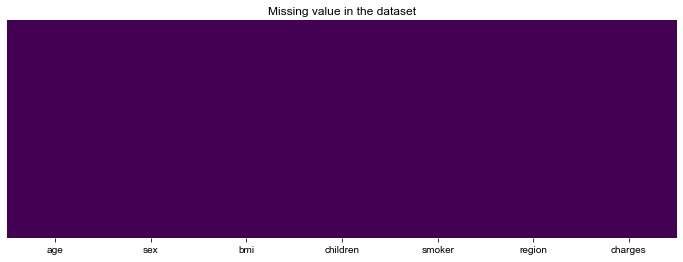

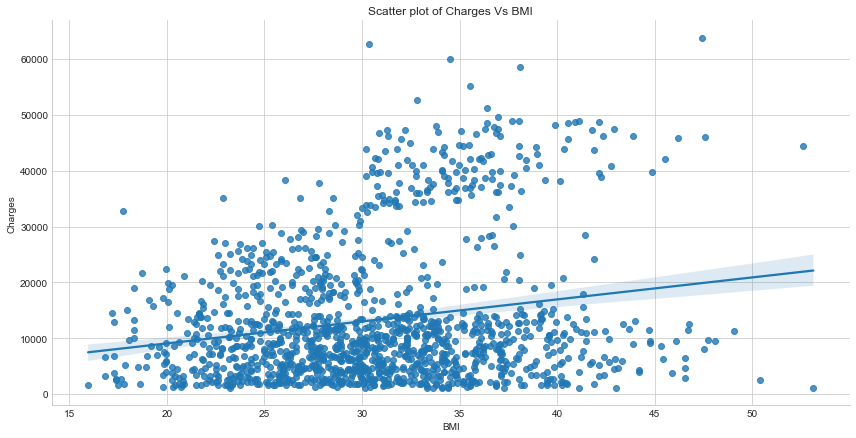

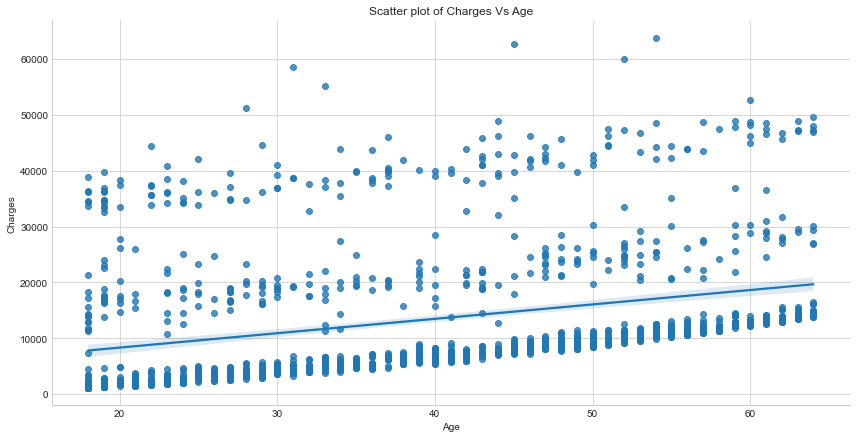

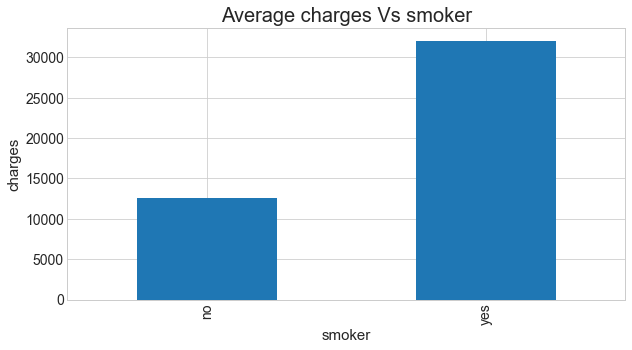

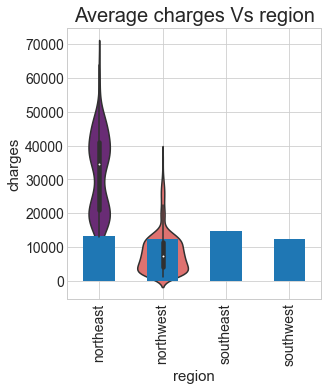

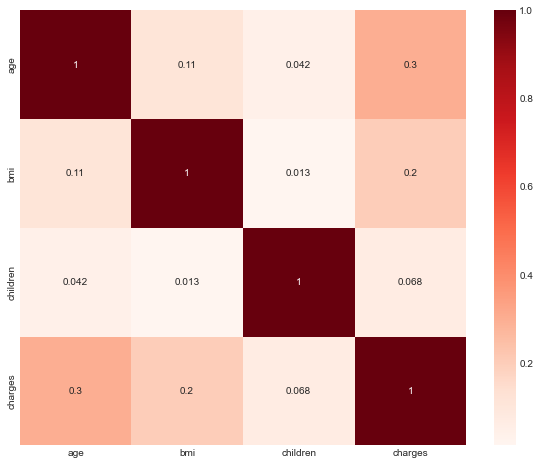

charges     1.000000
age         0.299008
bmi         0.198341
children    0.067998
Name: charges, dtype: float64


In [ ]:
#Import data_analysation file
import data_analysation

# Define x and y

In [ ]:
#Accessing the dataset through data_analysation file
df = data_analysation.dataset
df.describe()

In [5]:
# Dataset before pre-processing
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


# Preprocessing Dataset

In [6]:
#Creating dummy variables for the catergorical variable sex
df['Gender']=np.where(df['sex']=='female',1,0)

#Drop original column of sex
df.drop(columns=['sex'],axis=1,inplace=True)

df

In [7]:
#Creating dummy variables for the catergorical variable smoke
df['Smoker']=np.where(df['smoker']=='yes',1,0)

#Drop original column of smoke
df.drop(columns=['smoker'],axis=1,inplace=True)

In [8]:
# Print the first five rows in the dataset
df.head()

,age,bmi,children,region,charges,Gender,Smoker
0,19,27.900,0,southwest,16884.92400,1,1
1,18,33.770,1,southeast,1725.55230,0,0
2,28,33.000,3,southeast,4449.46200,0,0
3,33,22.705,0,northwest,21984.47061,0,0
4,32,28.880,0,northwest,3866.85520,0,0


In [9]:
#Create dummy variables for the categorical varable region
df['Northeast'] = np.where(df['region']=='northeast',1,0)
df['Northwest'] = np.where(df['region']=='northwest',1,0)
df['Southeast'] = np.where(df['region']=='southeast',1,0)
df['Southwest'] = np.where(df['region']=='southwest',1,0)

#Drop original column of region
df.drop(columns=['region'],axis=1,inplace=True)

In [10]:
# View the top 5 records in the dataset
df.head()

,age,bmi,children,charges,Gender,Smoker,Northeast,Northwest,Southeast,Southwest
0,19,27.900,0,16884.92400,1,1,0,0,0,1
1,18,33.770,1,1725.55230,0,0,0,0,1,0
2,28,33.000,3,4449.46200,0,0,0,0,1,0
3,33,22.705,0,21984.47061,0,0,0,1,0,0
4,32,28.880,0,3866.85520,0,0,0,1,0,0


In [11]:
# Print the dataset
print(df)

In [12]:
# Original categorical variable are remove
# One of the one hot encode varible column for perticular categorical variable is droped from the column.
from scipy.stats import boxcox
y_bc,lam, ci= boxcox(df['charges'],alpha=0.05)

ci,lam

((-0.01140290617294196, 0.0988096859767545), 0.043649053770664956)

In [13]:
# Log transform
df['charges'] = np.log(df['charges'])

In [14]:
df.head()

,age,bmi,children,charges,Gender,Smoker,Northeast,Northwest,Southeast,Southwest
0,19,27.900,0,9.734176,1,1,0,0,0,1
1,18,33.770,1,7.453302,0,0,0,0,1,0
2,28,33.000,3,8.400538,0,0,0,0,1,0
3,33,22.705,0,9.998092,0,0,0,1,0,0
4,32,28.880,0,8.260197,0,0,0,1,0,0


In [ ]:
# Declaring the dependent variable
dependent_variable ='charges'

In [16]:
#Creating a list of Independent Variables
independent_variables = df.columns.tolist()

In [17]:
#Removing the dependent varible from the other independent variables
independent_variables.remove(dependent_variable)

In [18]:
# Print the independent variables
independent_variables

['age',
 'bmi',
 'children',
 'Gender',
 'Smoker',
 'Northeast',
 'Northwest',
 'Southeast',
 'Southwest']